In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
ratings_df = pd.read_csv('./ml-latest-small/ratings.csv')

In [3]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
tags_df = pd.read_csv('./ml-latest-small/tags.csv')

In [5]:
tags_df.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [6]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
userId       100836 non-null int64
movieId      100836 non-null int64
rating       100836 non-null float64
timestamp    100836 non-null int64
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [7]:
ratings_df.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [8]:
tags_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
userId       3683 non-null int64
movieId      3683 non-null int64
tag          3683 non-null object
timestamp    3683 non-null int64
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


### I will need to come up with a way on how to properly encode the tag column

In [10]:
tags_df.describe()

,userId,movieId,timestamp
count,3683.000000,3683.000000,3.683000e+03
mean,431.149335,27252.013576,1.320032e+09
std,158.472553,43490.558803,1.721025e+08
min,2.000000,1.000000,1.137179e+09
25%,424.000000,1262.500000,1.137521e+09
50%,474.000000,4454.000000,1.269833e+09
75%,477.000000,39263.000000,1.498457e+09
max,610.000000,193565.000000,1.537099e+09


### I want to find out how many values there are for each tag to see how diverse the users' opinions are.

In [11]:
tags_df.tag.value_counts()

In Netflix queue           131
atmospheric                 36
superhero                   24
thought-provoking           24
Disney                      23
surreal                     23
funny                       23
religion                    22
psychology                  21
dark comedy                 21
quirky                      21
sci-fi                      21
suspense                    20
twist ending                19
crime                       19
visually appealing          19
politics                    18
music                       16
time travel                 16
mental illness              16
aliens                      15
comedy                      15
dark                        15
space                       14
mindfuck                    14
dreamlike                   14
black comedy                13
emotional                   13
heist                       13
Stephen King                12
                          ... 
brothers                     1
No DVD a

### The issue I have with the tags is that since they are created by the user there is a lot of cleaning required to take advantage of this column

In [13]:
movies_df = pd.read_csv('./ml-latest-small/movies.csv')

In [14]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [15]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
movieId    9742 non-null int64
title      9742 non-null object
genres     9742 non-null object
dtypes: int64(1), object(2)
memory usage: 228.4+ KB


### The genres column can provide us a lot of useful information. However, I need to clean the data and encode it properly. According to the documentation of the dataset, there are 19 genres including an unspecified one.

### So far I could use k-means since I know that there are 19 genres. However, I want to investigate what else I can do with the data. Another possibility is to combine the genres and timestamps to create clusters

### Another possibility is to combine the genres and timestamps to create clusters

### I want to find a way to take advantage of the user created tags, maybe if I can combine them with the genres and create clusters and then reassing these back into the datasets I could do something useful with them.

In [20]:
tags_df.groupby(['movieId']).head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
5,2,89774,Tom Hardy,1445715205
6,2,106782,drugs,1445715054
7,2,106782,Leonardo DiCaprio,1445715051
8,2,106782,Martin Scorsese,1445715056
9,7,48516,way too long,1169687325


In [21]:
# From this I can see that a movie has more than one tag and they make sense.
# For example: Movie 18 has tags (Al Pacino, mafia, gangster), most probably this movie is the Godfather
# I have to find a way to keep this relations in the model

In [22]:
movies_df[movies_df.movieId == 1221] 

,movieId,title,genres
922,1221,"Godfather: Part II, The (1974)",Crime|Drama


In [23]:
# First I will focus on finding a way to properly encode the genre column in movies_df
# One-hot encoding wouldn't work as it would introduce too many dimensions into the problem

In [24]:
len(movies_df.genres.unique())

951

In [25]:
# The idea I have for encoding is to perform one hot encoding on the genres.
# This means properly extracting the genres and adding 19 new columns
# I want to test this to see if the extra dimensionality affects negatively the model
# Also because I want to keep the relationships between different categories
# After creating this I will test k-means using 19 clusters to see how the data gets distributed

In [26]:
movies_df.genres.str.split(pat='|')[0]

['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy']

In [27]:
genres_onehot= movies_df.genres.str.get_dummies()

In [28]:
movies_df = movies_df.join(genres_onehot)

In [29]:
movies_df.head()

,movieId,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


### I want to review if there are any rows that have no genres listed.

In [30]:
movies_df[movies_df["(no genres listed)"] == 1]

,movieId,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
8517,114335,La cravate (1957),(no genres listed),1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8684,122888,Ben-hur (2016),(no genres listed),1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8687,122896,Pirates of the Caribbean: Dead Men Tell No Tal...,(no genres listed),1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8782,129250,Superfast! (2015),(no genres listed),1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8836,132084,Let It Be Me (1995),(no genres listed),1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8902,134861,Trevor Noah: African American (2013),(no genres listed),1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9033,141131,Guardians (2016),(no genres listed),1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9053,141866,Green Room (2015),(no genres listed),1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9070,142456,The Brand New Testament (2015),(no genres listed),1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9091,143410,Hyena Road,(no genres listed),1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Yes there are some movies with no genres listed, we can keep those there.

### Now we can drop the genres column.

In [31]:
movies_df.drop(['genres'], axis=1, inplace=True)

movies_df.head()

### I want to run kmeans in this dataset to see how the clusters get shaped if I define 19 clusters (amount of genres) plus 1 (movies that have no defined genre). Therefore, there are 20 in total.

In [35]:
kmeans_model = KMeans(20)
kmeans_model.fit(movies_df.drop(['title'],axis=1))
clust_labels = kmeans_model.predict(movies_df.drop(['title'],axis=1))
cent = kmeans_model.cluster_centers_

In [39]:
pd.DataFrame(clust_labels)[0].unique()

array([ 0, 15,  6,  8, 13,  4, 10, 16,  2, 14,  7, 19,  3, 17,  9,  1, 11,
       18,  5, 12])

### I want to see how many unique labels we have after applying the clustering algorithm.

### I wanted to display this data in a scatter plot. However, I need more variables as in this data set I only have tag related variables. Therefore, I will combine this dataset with the ratings and then I will display the ratings on the y axis. I will also extract the year out of the title and assign it as another feature and display this on the x axis

### I will start by extracting the year off the title

In [42]:
movies_df['Year'] = movies_df.title.str.extract(pat='\((\d+)\)')

In [43]:
movies_df.head()

,movieId,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Year
0,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1995
1,2,Jumanji (1995),0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1995
2,3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1995
3,4,Waiting to Exhale (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1995
4,5,Father of the Bride Part II (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1995


In [44]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 23 columns):
movieId               9742 non-null int64
title                 9742 non-null object
(no genres listed)    9742 non-null int64
Action                9742 non-null int64
Adventure             9742 non-null int64
Animation             9742 non-null int64
Children              9742 non-null int64
Comedy                9742 non-null int64
Crime                 9742 non-null int64
Documentary           9742 non-null int64
Drama                 9742 non-null int64
Fantasy               9742 non-null int64
Film-Noir             9742 non-null int64
Horror                9742 non-null int64
IMAX                  9742 non-null int64
Musical               9742 non-null int64
Mystery               9742 non-null int64
Romance               9742 non-null int64
Sci-Fi                9742 non-null int64
Thriller              9742 non-null int64
War                   9742 non-null int64
Western   

In [46]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
userId       100836 non-null int64
movieId      100836 non-null int64
rating       100836 non-null float64
timestamp    100836 non-null int64
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [49]:
final_df = movies_df.merge(ratings_df,on="movieId",how='inner')

In [50]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 26 columns):
movieId               100836 non-null int64
title                 100836 non-null object
(no genres listed)    100836 non-null int64
Action                100836 non-null int64
Adventure             100836 non-null int64
Animation             100836 non-null int64
Children              100836 non-null int64
Comedy                100836 non-null int64
Crime                 100836 non-null int64
Documentary           100836 non-null int64
Drama                 100836 non-null int64
Fantasy               100836 non-null int64
Film-Noir             100836 non-null int64
Horror                100836 non-null int64
IMAX                  100836 non-null int64
Musical               100836 non-null int64
Mystery               100836 non-null int64
Romance               100836 non-null int64
Sci-Fi                100836 non-null int64
Thriller              100836 non-null int64
War     

In [51]:
final_df.head()

,movieId,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Mystery,Romance,Sci-Fi,Thriller,War,Western,Year,userId,rating,timestamp
0,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,1995,1,4.0,964982703
1,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,1995,5,4.0,847434962
2,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,1995,7,4.5,1106635946
3,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,1995,15,2.5,1510577970
4,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,1995,17,4.5,1305696483


### However, I have noticed that my method of doing this is not the best. I will group up the ratings by movieId and then calculate the average of the ratings

In [226]:
avgratings_df = ratings_df.groupby('movieId',as_index=False).rating.mean()

In [77]:
avgratings_df.head()

,movieId,rating
0,1,3.920930
1,2,3.431818
2,3,3.259615
3,4,2.357143
4,5,3.071429


In [59]:
final_df = movies_df.merge(avgratings_df,on="movieId",how='inner')

In [60]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9724 entries, 0 to 9723
Data columns (total 24 columns):
movieId               9724 non-null int64
title                 9724 non-null object
(no genres listed)    9724 non-null int64
Action                9724 non-null int64
Adventure             9724 non-null int64
Animation             9724 non-null int64
Children              9724 non-null int64
Comedy                9724 non-null int64
Crime                 9724 non-null int64
Documentary           9724 non-null int64
Drama                 9724 non-null int64
Fantasy               9724 non-null int64
Film-Noir             9724 non-null int64
Horror                9724 non-null int64
IMAX                  9724 non-null int64
Musical               9724 non-null int64
Mystery               9724 non-null int64
Romance               9724 non-null int64
Sci-Fi                9724 non-null int64
Thriller              9724 non-null int64
War                   9724 non-null int64
Western   

### final_df should have the 9742 rows that movies_df has. There has to be some rows that have nan for movieId in one of the two df.

In [63]:
avgratings_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9724 entries, 1 to 193609
Data columns (total 1 columns):
rating    9724 non-null float64
dtypes: float64(1)
memory usage: 151.9 KB


### The issue comes from avgratings_df, it has 9724 rows. I want to know which movieId's don't have a rating

In [95]:
movies_df[~movies_df.movieId.isin(avgratings_df.movieId)]

,movieId,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Year
816,1076,"Innocents, The (1961)",0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1961
2211,2939,Niagara (1953),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1953
2499,3338,For All Mankind (1989),0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1989
2587,3456,"Color of Paradise, The (Rang-e khoda) (1999)",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1999
3118,4194,I Know Where I'm Going! (1945),0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1945
4037,5721,"Chosen, The (1981)",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1981
4506,6668,"Road Home, The (Wo de fu qin mu qin) (1999)",0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1999
4598,6849,Scrooge (1970),0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1970
4704,7020,Proof (1991),0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1991
5020,7792,"Parallax View, The (1974)",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1974


In [100]:
avgratings_df[avgratings_df.movieId==85565]

,movieId,rating


### I wanted to make sure that my syntax was correct.
### There are 18 rows which dont have any rating. These rows have already been dropped during the inner union.

In [101]:
final_df.head()

,movieId,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Year,rating
0,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,1995,3.920930
1,2,Jumanji (1995),0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1995,3.431818
2,3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1995,3.259615
3,4,Waiting to Exhale (1995),0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1995,2.357143
4,5,Father of the Bride Part II (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1995,3.071429


In [119]:
final_df[final_df.isna().any(axis=1)]

,movieId,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Year,rating
6042,40697,Babylon 5,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,NaN,2.25
9013,140956,Ready Player One,0,1,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,NaN,3.50
9073,143410,Hyena Road,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,2.00
9120,147250,The Adventures of Sherlock Holmes and Doctor W...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,5.00
9161,149334,Nocturnal Animals,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,NaN,3.00
9241,156605,Paterson,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,4.50
9349,162414,Moonlight,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,5.00
9430,167570,The OA,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,4.00
9496,171495,Cosmos,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,4.50
9497,171631,Maria Bamford: Old Baby,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,1.00


### There are 13 movies which do not have year information, we will drop these as they represent a small subset.

In [121]:
final_df.dropna(subset=['Year'], inplace=True)

### Now we will cluster the algorithms using a k-means as we know that we have 19 categories.

In [123]:
kmeans_model = KMeans(20)
kmeans_model.fit(final_df.drop(['title'],axis=1))
clust_labels = kmeans_model.predict(final_df.drop(['title'],axis=1))
cent = kmeans_model.cluster_centers_

In [128]:
kmeans = pd.DataFrame(clust_labels)

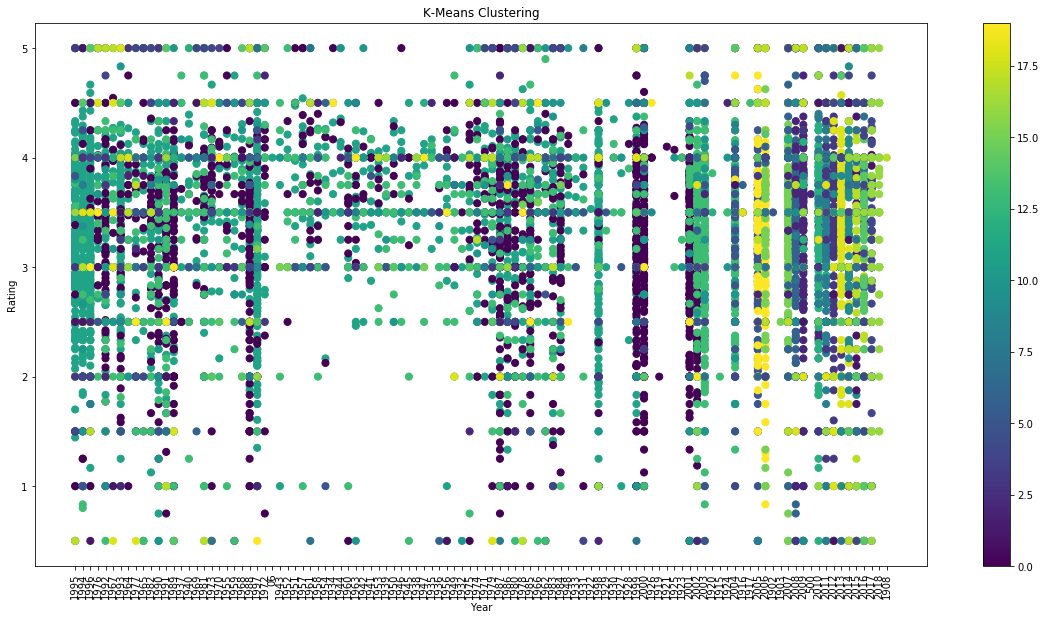

In [144]:
fig = plt.figure(figsize=[20,10])
ax = fig.add_subplot(111)
scatter = ax.scatter(final_df['Year'],final_df['rating'],
                     c=kmeans[0],s=50)
ax.set_title('K-Means Clustering')
plt.xticks(rotation='vertical')
ax.set_xlabel('Year')
ax.set_ylabel('Rating')
plt.colorbar(scatter)

### There are some weird values like 06 and 500, I will find out what is going on with them.

In [149]:
final_df[final_df.Year == '06']

,movieId,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Year,rating
674,889,1-900 (06) (1994),0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,06,4.0


In [150]:
final_df[final_df.Year == '500']

,movieId,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Year,rating
7058,69757,(500) Days of Summer (2009),0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,500,3.666667


### There was an issue with our extract method, we will modify so we look for the last iteration of a numher in between parentheses at the title.

In [152]:
movies_df['Year'] = movies_df.title.str.extract(pat='\((\d+)\)$')

In [156]:
movies_df[movies_df.movieId == 889]

,movieId,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Year
674,889,1-900 (06) (1994),0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1994


In [157]:
movies_df[movies_df.movieId == 69757]

,movieId,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Year
7075,69757,(500) Days of Summer (2009),0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,2009


### This new method gets the year correctly, now I will also cast this value to an integer.

In [165]:
final_df['Year'] = final_df.title.str.extract(pat='\((\d+)\)$')

In [166]:
final_df[final_df.Year.isna()]

,movieId,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Year,rating
5596,27008,From Dusk Till Dawn 2: Texas Blood Money (1999),0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,NaN,1.00
6689,58404,Justice League: The New Frontier (2008),0,1,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,NaN,2.75
6701,58842,Assembly (Ji jie hao) (2007),0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,NaN,4.50
7860,94494,96 Minutes (2011),0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,NaN,2.50
7878,95004,Superman/Doomsday (2007),0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,4.00
7892,95193,Pocahontas II: Journey to a New World (1998),0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,NaN,2.00
7960,96608,Runaway Brain (1995),0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,NaN,5.00
8130,102084,Justice League: Doom (2012),0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,5.00
8210,104017,3 dev adam (Three Giant Men) (1973),0,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,NaN,0.50
8284,106648,Guilty of Romance (Koi no tsumi) (2011),0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,NaN,3.00


### We will drop these rows as they are a small subset and our method to extract the year did not work.

In [168]:
final_df.dropna(subset=['Year'], inplace=True)

In [172]:
final_df.Year = final_df.Year.astype(int)

### We will run the clustering method now again.

In [174]:
kmeans_model = KMeans(20)
kmeans_model.fit(final_df.drop(['title'],axis=1))
clust_labels = kmeans_model.predict(final_df.drop(['title'],axis=1))
cent = kmeans_model.cluster_centers_

In [175]:
kmeans = pd.DataFrame(clust_labels)

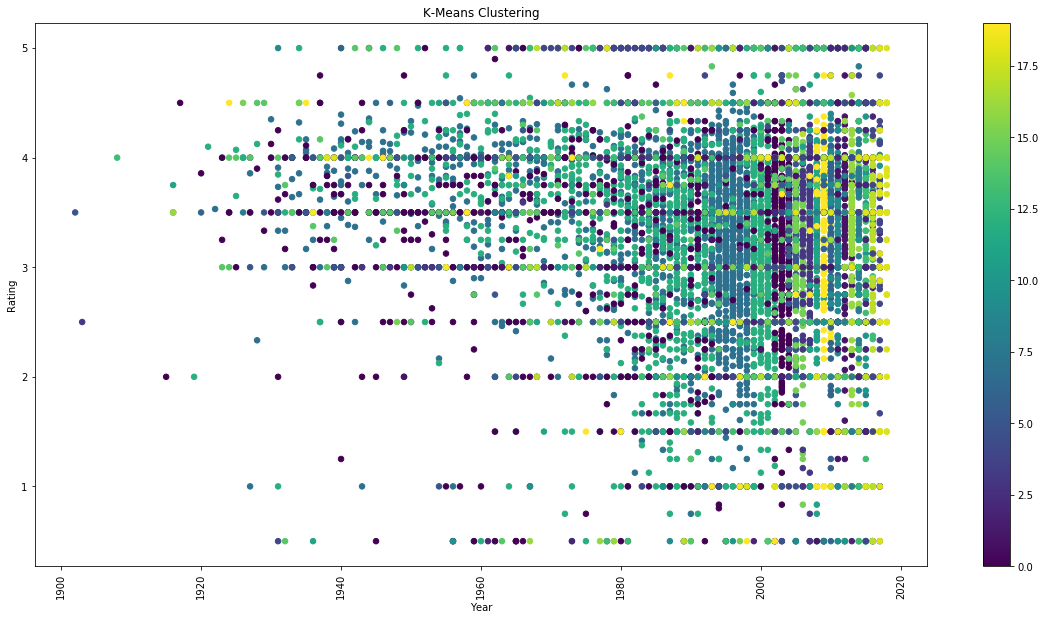

In [183]:
fig = plt.figure(figsize=[20,10])
ax = fig.add_subplot(111)
scatter = ax.scatter(final_df['Year'],final_df['rating'],
                     c=kmeans[0],s=30)
ax.set_title('K-Means Clustering')
plt.xticks(rotation='vertical')
ax.set_xlabel('Year')
ax.set_ylabel('Rating')
plt.colorbar(scatter)

### It is hard to get some information out of this image. However, it is possible to get some information out of it. For example, movies around the mid 2000's are all around the same cluster. Also the movies around early 2000's belong to the same cluster while movies at the late 1990's belong to a similar cluster.

### I want to attempt to group the variables by their ratings to see if k-means can do a good job there; there are 5 ratings so I will specifiy 5 clusters.

In [188]:
kmeans_model = KMeans(5)
kmeans_model.fit(final_df.drop(['title'],axis=1))
clust_labels = kmeans_model.predict(final_df.drop(['title'],axis=1))
cent = kmeans_model.cluster_centers_

In [189]:
kmeans = pd.DataFrame(clust_labels)

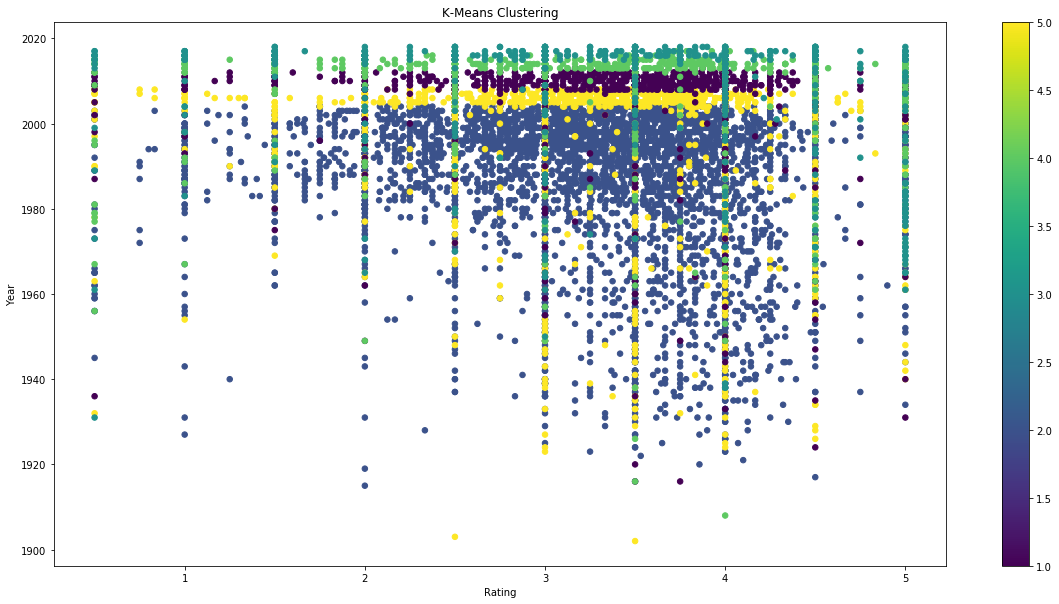

In [193]:
fig = plt.figure(figsize=[20,10])
ax = fig.add_subplot(111)
scatter = ax.scatter(final_df['rating'],final_df['Year'],
                     c=kmeans[0]+1,s=30)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Rating')
ax.set_ylabel('Year')
plt.colorbar(scatter)

### Surprisingly the ratings have largely grouped in deltas of 0.5. Then we have more range of years in ratings 0.5, 1.0, 1.5, 2.0, etc
### Also kmeans has grouped a large amount of mobies in between ratings 2.0 and years 1980 and mid 2000's
### The groups are more clear using only 5 clusters and representing the data in this shape

### I want to use a clustering algorithm that creates percentages for the clusters. I think that this technique will be more appropriate for dealing with movie genres.

In [197]:
final_df.shape[1]

24

In [198]:
final_df.insert((final_df.shape[1]), 'kmeans', kmeans)

In [201]:
final_df.head(20)

,movieId,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Year,rating,kmeans
0,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,1995,3.920930,1.0
1,2,Jumanji (1995),0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1995,3.431818,1.0
2,3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1995,3.259615,1.0
3,4,Waiting to Exhale (1995),0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1995,2.357143,1.0
4,5,Father of the Bride Part II (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1995,3.071429,1.0
5,6,Heat (1995),0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1995,3.946078,1.0
6,7,Sabrina (1995),0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1995,3.185185,1.0
7,8,Tom and Huck (1995),0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1995,2.875000,1.0
8,9,Sudden Death (1995),0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1995,3.125000,1.0
9,10,GoldenEye (1995),0,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1995,3.496212,1.0


### It seems like kmeans has created clusters based on the position on the table. Maybe this is due to the presence of the movieId column which has a sequential nature. I will remove this column and rerun the algorithm with the 5 clusters.

In [206]:
final_df.drop('movieId', axis=1,inplace=True)

### I will also drop the kmeans column which contains the values of the previous kmeans.

In [207]:
final_df.drop('kmeans', axis=1,inplace=True)

In [208]:
kmeans_model = KMeans(5)
kmeans_model.fit(final_df.drop(['title'],axis=1))
clust_labels = kmeans_model.predict(final_df.drop(['title'],axis=1))
cent = kmeans_model.cluster_centers_

In [209]:
kmeans = pd.DataFrame(clust_labels)

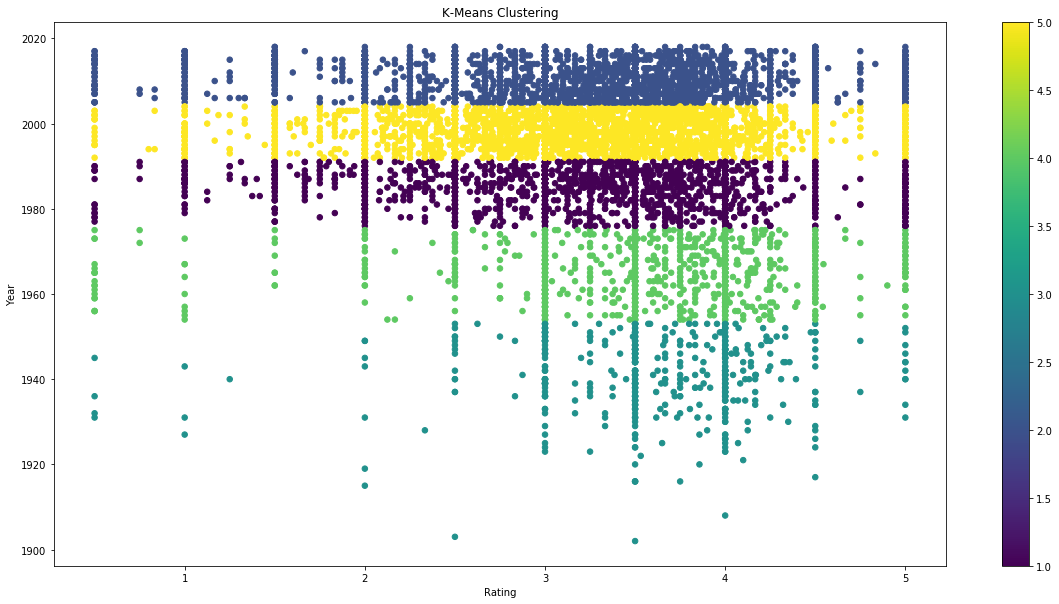

In [210]:
fig = plt.figure(figsize=[20,10])
ax = fig.add_subplot(111)
scatter = ax.scatter(final_df['rating'],final_df['Year'],
                     c=kmeans[0]+1,s=30)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Rating')
ax.set_ylabel('Year')
plt.colorbar(scatter)

### The result with the Id is extremely well shaped.

In [211]:
final_df.insert((final_df.shape[1]), 'kmeans', kmeans)

In [213]:
final_df.head(20)

,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Year,rating,kmeans
0,Toy Story (1995),0,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,1995,3.920930,4.0
1,Jumanji (1995),0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1995,3.431818,4.0
2,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1995,3.259615,4.0
3,Waiting to Exhale (1995),0,0,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,1995,2.357143,4.0
4,Father of the Bride Part II (1995),0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1995,3.071429,4.0
5,Heat (1995),0,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1995,3.946078,4.0
6,Sabrina (1995),0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1995,3.185185,4.0
7,Tom and Huck (1995),0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1995,2.875000,4.0
8,Sudden Death (1995),0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1995,3.125000,4.0
9,GoldenEye (1995),0,1,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1995,3.496212,4.0


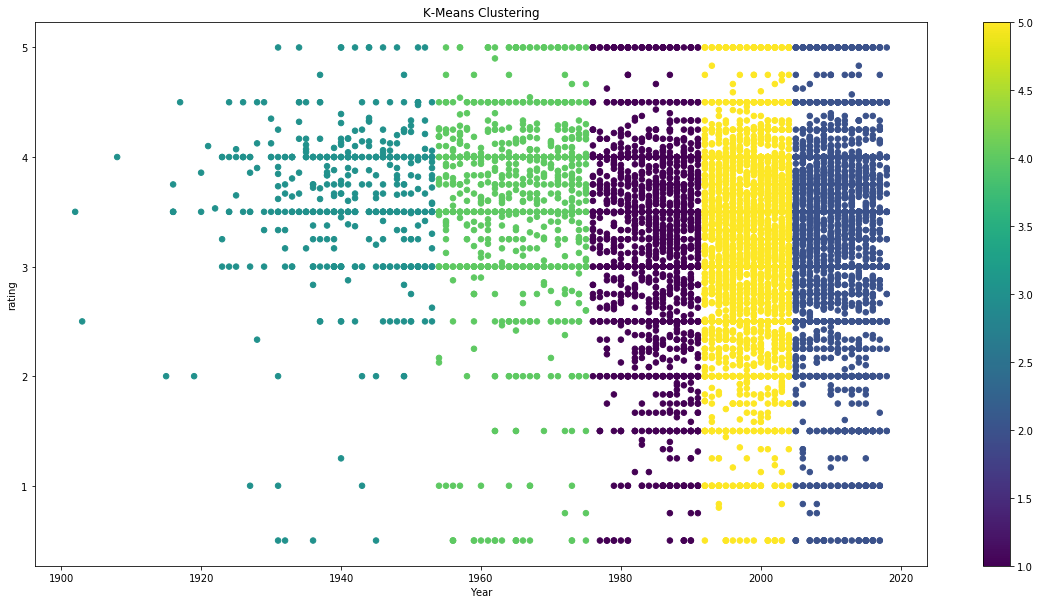

In [214]:
fig = plt.figure(figsize=[20,10])
ax = fig.add_subplot(111)
scatter = ax.scatter(final_df['Year'],final_df['rating'],
                     c=kmeans[0]+1,s=30)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Year')
ax.set_ylabel('rating')
plt.colorbar(scatter)

### It seems that without the movieId columns, k-means has split the movies according to the time period they premiered. I will run k-means again but this time I want to use the 19 clusters that should belong to the genres.

In [218]:
final_df.drop('kmeans', axis=1,inplace=True)

In [219]:
kmeans_model = KMeans(20)
kmeans_model.fit(final_df.drop(['title'],axis=1))
clust_labels = kmeans_model.predict(final_df.drop(['title'],axis=1))
cent = kmeans_model.cluster_centers_

In [220]:
kmeans = pd.DataFrame(clust_labels)

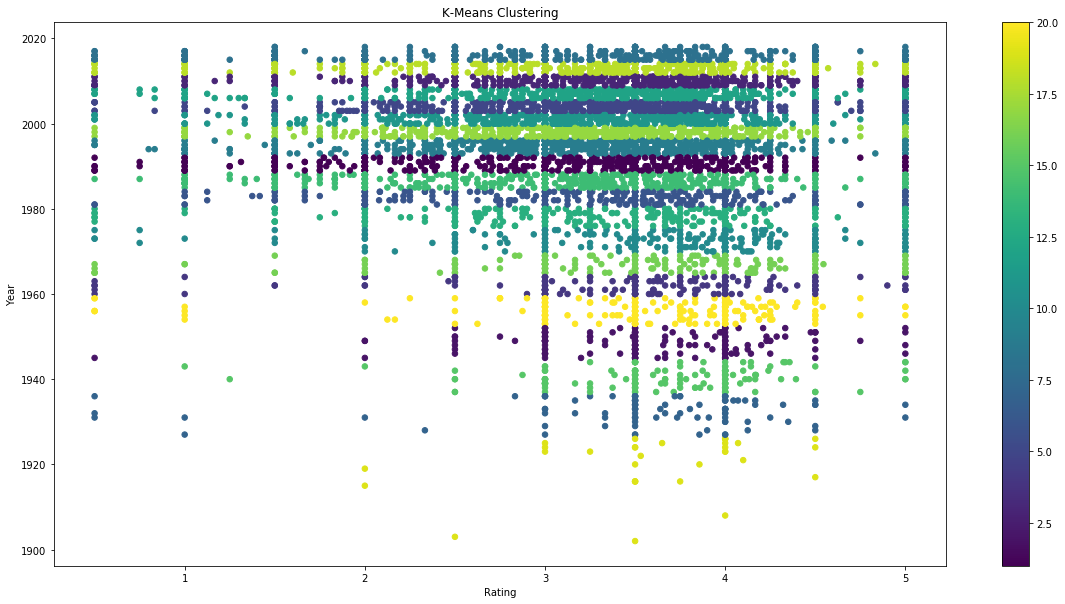

In [221]:
fig = plt.figure(figsize=[20,10])
ax = fig.add_subplot(111)
scatter = ax.scatter(final_df['rating'],final_df['Year'],
                     c=kmeans[0]+1,s=30)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Rating')
ax.set_ylabel('Year')
plt.colorbar(scatter)

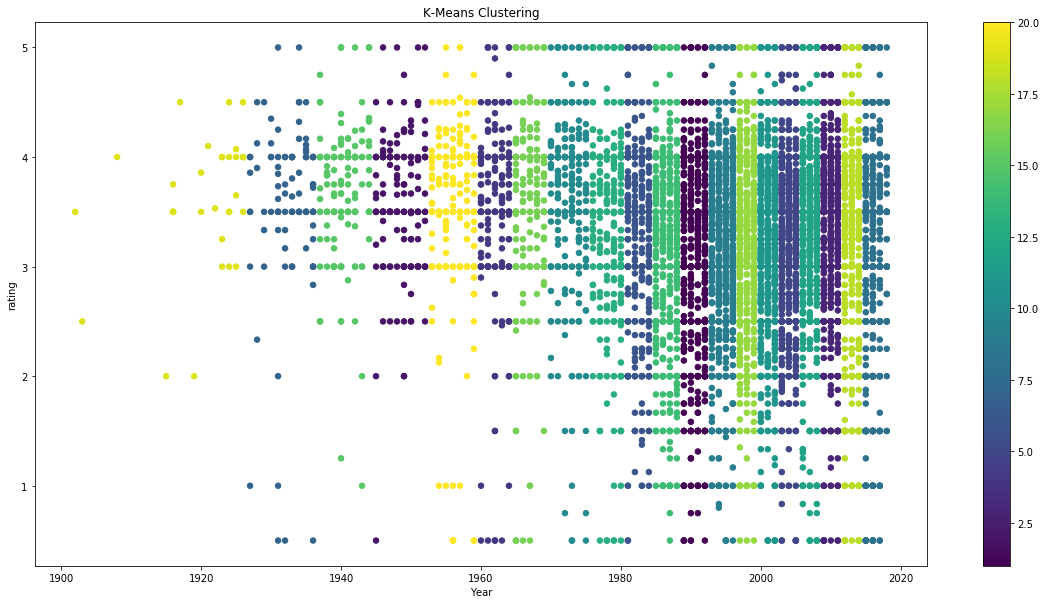

In [222]:
fig = plt.figure(figsize=[20,10])
ax = fig.add_subplot(111)
scatter = ax.scatter(final_df['Year'],final_df['rating'],
                     c=kmeans[0]+1,s=30)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Year')
ax.set_ylabel('rating')
plt.colorbar(scatter)

### It is doing the same thing, just diving the groups depending on the year they belong to. However, it seems like it is doing so depending on the quantity of movies that are in each era.

### Now I will attempt to use another clustering algorithm to see what I can do about this.

### I will use hierarchical agglomerative clustering and see what happens with this one.

In [227]:
from sklearn.cluster import AgglomerativeClustering

In [228]:
aggcluster = AgglomerativeClustering(n_clusters=20, affinity='euclidean', linkage='ward')

In [230]:
aggcluster.fit_predict(final_df.drop(['title'],axis=1))

array([ 4,  4,  4, ..., 14, 14,  4])

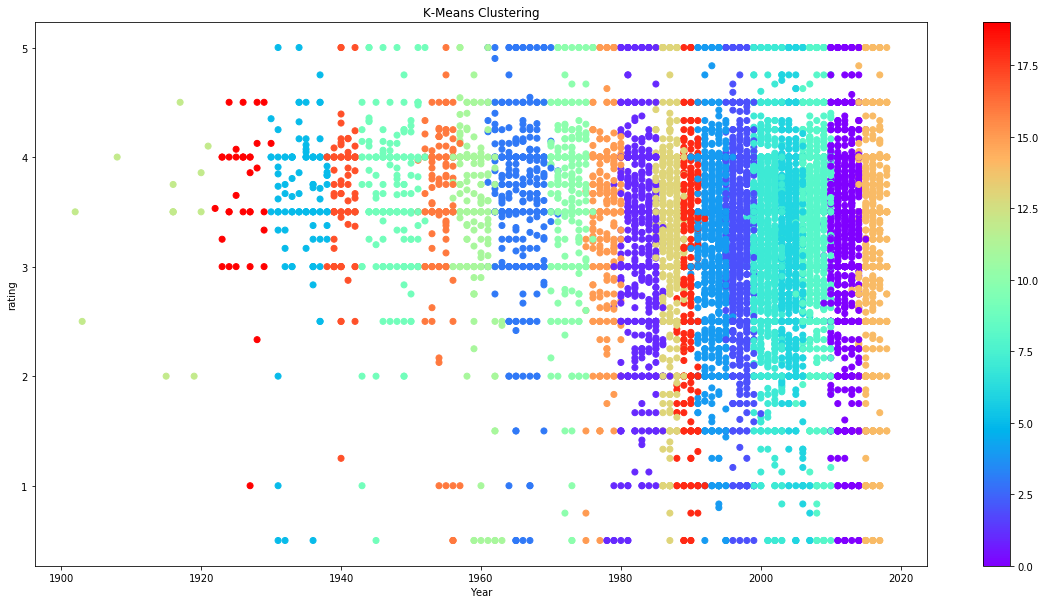

In [231]:
fig = plt.figure(figsize=[20,10])
ax = fig.add_subplot(111)
scatter = ax.scatter(final_df['Year'],final_df['rating'],
                     c=aggcluster.labels_,cmap='rainbow')
ax.set_title('K-Means Clustering')
ax.set_xlabel('Year')
ax.set_ylabel('rating')
plt.colorbar(scatter)

### Hierarchical agglomerative clustering seems to be doing a similar job to k-means. However, the boundaries between clusters are not that clear in this case.
### Both algorithms have created the clusters based on the year the movie it came out. It seems like they are taking into account the amount of movies that came out in each time period. Therefore, since movies between 1900 and 1920 have a few movies while movies between 2015 and 2020 have a lot of movies.
### I want to see if a similar thing happens when I use 5 clusters.

In [232]:
aggcluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')

In [233]:
aggcluster.fit_predict(final_df.drop(['title'],axis=1))

array([0, 0, 0, ..., 4, 4, 0])

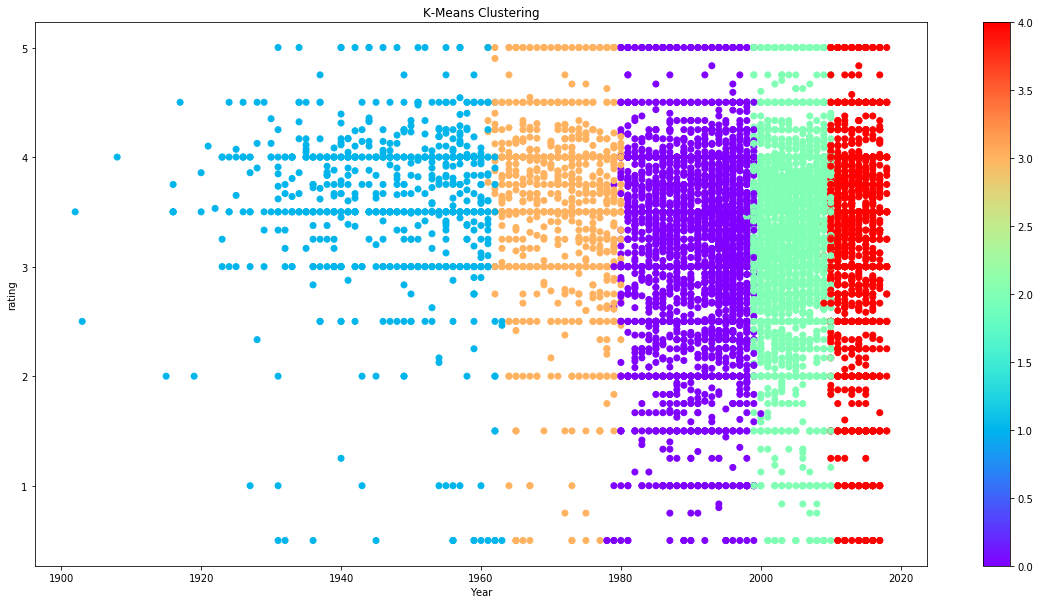

In [234]:
fig = plt.figure(figsize=[20,10])
ax = fig.add_subplot(111)
scatter = ax.scatter(final_df['Year'],final_df['rating'],
                     c=aggcluster.labels_,cmap='rainbow')
ax.set_title('K-Means Clustering')
ax.set_xlabel('Year')
ax.set_ylabel('rating')
plt.colorbar(scatter)

### As with 20 clusters, with 5 clusters, the algorithm has grouped based on the year the movie came out.

### Summary of what I did in this project:
I analyzed each dataset to see what useful data I could use. I initially focused in the user tags assuming that they would be relatively clean. However, this field was extremely dirty and I could not come up with any way on how to make this field usable. Therefore, I shifted my atention to the genres that were listed for each movie. The genres were all grouped up into a single column and I had to find a way to first separate the genres and then find a way to encode them into the dataframe. In the end I ended up going for a one-hot encoding.

Then I wanted to make use of data such as the ratings. However, each user had input different ratings for the same movie, which forced me to group the data by movieId and then calculate the total average. This method adds a lot of noise caused by any outliers but I was willing to take this risk. Then I used an inner join to add the average ratings to the respective movies. Then I extracted the movie year, data which was embedded in the movie title. I had a first attempt which mostly work but needed some fixing to accurately extract the year.

Finally, I started working on the clustering algorithms. First I chose to use K-means to get a base idea on how the clustering would work. I used k-means with 20 clusters because I expected to get clusters based on the movie genres. However, k-means did not seem to cluster the movies in any specific order. Then I realized that k-means was clustering the movies in a sequential order, which was most probably caused by the movieId column which is in sequential order. Then I dropped this column and tested k-means again, this time I obtained different results. K-means seemed to focus on the year the movies came out and it used that to do the grouping. Something interesting is the each clusters took into account the amount of movies for that period of time. Therefore, a period of time with a low quantity of movies is larger than one with more movies. I tested again with 5 clusters to see if this time it would focus more on the ratings but the situation did not change.

I wanted to test another clustering algorithm and decided to use Agglomerative clustering which yielded similar results to k-means. However, agglomerative clustering had more distoreted edges between clusters.
